# 1. 探索花哨的索引

花哨的索引在概念上非常简单，它意味着传递一个索引数组来一次性获得多个数组元素

In [1]:
import numpy as np
rand = np.random.RandomState(42)

x = rand.randint(100, size=10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


In [2]:
# 假如我们希望获得三个不同的元素，可以用以下方式实现:
print([x[3], x[7], x[2]])

# 另外一种方式是通过传递索引的单个列表或数组来获得同样的效果
ind = [3, 7, 4]
x[ind]

[71, 86, 14]


array([71, 86, 60])

In [3]:
"""利用花哨的索引，结果的形状与索引数组的形状一致，而不是与被索引数组的形状一致"""
ind = np.array([[3, 7],
                [4, 5]])
x[ind]

array([[71, 86],
       [60, 20]])

In [4]:
"""花哨的索引也对多个维度适用,和标准的索引方式一样，第一个索引指的是行，第二个索引指定是列"""
X = np.arange(12).reshape((3, 4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [5]:
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
X[row, col]

array([ 2,  5, 11])

In [6]:
""""
在花哨的索引中，索引值的配对遵循广播的规则
因此当我们将一个列向量和一个行向量组合在一个索引中时，会得到一个二维的结果
"""
X[row[:, np.newaxis], col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

In [7]:
"""这里，每一行的值都与每一列的向量配对，正如我们看到的广播的算术运算"""
row[:, np.newaxis] * col

array([[0, 0, 0],
       [2, 1, 3],
       [4, 2, 6]])

花哨的索引返回的值反映的是广播后的索引数组的形状，而不是被索引的数组的形状

# 2. 组合索引

In [8]:
print(X)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [9]:
"""将花哨的索引和简单的索引组合起来使用"""
X[2, [2, 0, 1]]

array([10,  8,  9])

In [10]:
"""将花哨的索引和切片组合使用"""
X[1:, [2, 0, 1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

In [11]:
"""将花哨的索引和掩码组合使用"""
mask = np.array([1, 0, 1, 0], dtype=bool)
X[row[:, np.newaxis], mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

# 3. 示例：选择随机点

In [12]:
"""花哨的索引的一个常见用途是从一个矩阵中选择行的子集"""
mean = [0, 0]
cov = [[1, 2],
       [2, 5]]
X = rand.multivariate_normal(mean, cov, 100)  # 二维正态分布的点
X.shape

(100, 2)

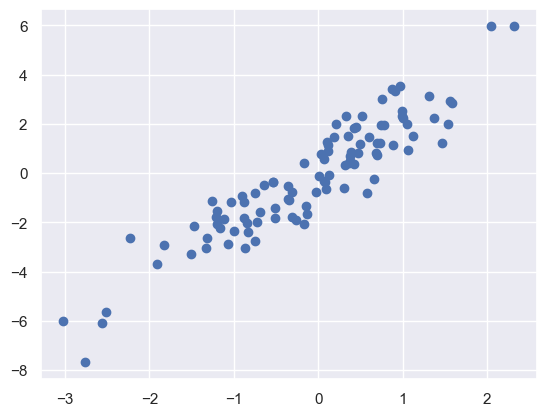

In [13]:
#进行可视化
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # 设置绘图风格

plt.scatter(X[:, 0], X[:, 1]);

In [14]:
"""选取20个随机的、不重复的索引值，并利用这些索引值选取到原始数组对应的值"""
indices = np.random.choice(X.shape[0], 20, replace=False)
indices

array([69, 13, 80, 65, 82, 60, 77, 67,  6, 43, 28, 37, 99, 70, 46, 34, 31,
       52, 96, 66])

In [15]:
selection = X[indices]
selection.shape

(20, 2)

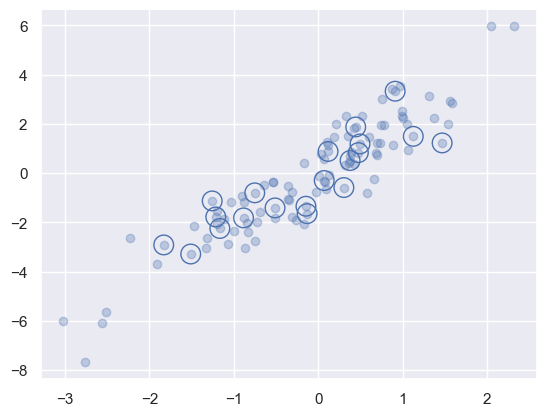

In [16]:
"""将选中的点在图上用大圆圈标示出来"""
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
plt.scatter(selection[:, 0], selection[:, 1], facecolor='none', edgecolors='b', s=200);

这种方法通常用于快速分割数据，即需要分割训练/测试数据集以验证统计模型时，以及在解答统计问题时的抽样方法中使用

# 4. 用花哨的索引修改值

In [19]:
x = np.arange(10)
i = np.array([2, 1, 8, 4])
x[i] = 99
print(x)

[ 0 99 99  3 99  5  6  7 99  9]


In [21]:
x[i] -= 10
print(x)

[ 0 79 79  3 79  5  6  7 79  9]


In [22]:
"""需要注意操作中重复的索引会导致一些出乎意料的结果产生"""
x = np.zeros(10)
x[[0, 0]] = [4, 6]
print(x)  # 先赋值x[0] = 4, 然后赋值x[0] = 6


[6. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [23]:
"""下列操作并不能通过重复的索引实现累加"""
i = [2, 3, 3, 4, 4, 4]
x[i] += 1
x

array([6., 0., 1., 1., 1., 0., 0., 0., 0., 0.])

In [25]:
"""若想实现累加，可以这样"""
x = np.zeros(10)
np.add.at(x, i, 1)
print(x)

[0. 0. 1. 2. 3. 0. 0. 0. 0. 0.]


at()函数对于给定的操作，给定的索引以及给定的值执行的是就地操作。

# 5.示例:数据区间划分

可以用这些方法有效地将数据进行区间划分并手动创建直方图

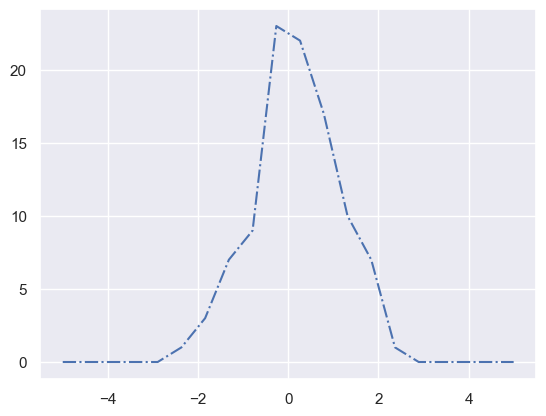

In [39]:
"""例如，假定我们有100个值，希望快速统计分布在每个区间的数据频次"""
np.random.seed(42)
x = np.random.randn(100)

# 手动计算直方图
bins = np.linspace(-5, 5, 20)
counts = np.zeros_like(bins)

# 为每个x找到合适的区间
i = np.searchsorted(bins, x)

# 为每个区间加上1
np.add.at(counts, i, 1)

# 画出结果
plt.plot(bins, counts, linestyle='dashdot');

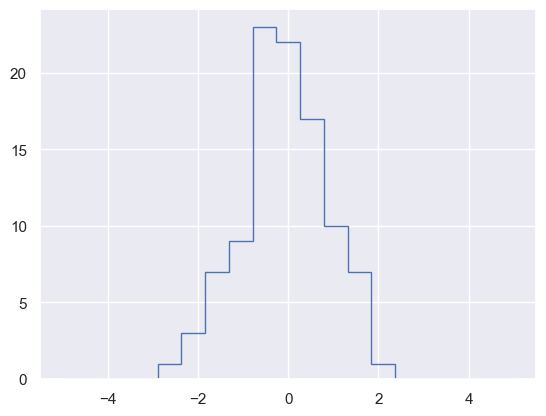

In [42]:
"""同样可以使用matplotlib绘图"""
plt.hist(x, bins, histtype='step');

In [44]:
"""Matplotlib使用的是np.histogram。对两种方法进行比较"""
print("NumPy routine:")
%timeit counts, edges = np.histogram(x, bins)

print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy routine:
19.5 µs ± 536 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
Custom routine:
10.8 µs ± 103 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [45]:
"""NumPy在数据点比较大时有更能显示出其良好的性能"""
x = np.random.randn(1000000)

print("NumPy routine:")
%timeit counts, edges = np.histogram(x, bins)

print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy routine:
56.4 ms ± 456 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
Custom routine:
77.1 ms ± 900 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


一个对大数据集非常有效的算法并不总是小数据集的最佳选择，反之同理。
因此在不同的应用场景需要知道使用什么样的函数